<a href="https://colab.research.google.com/github/jiehyunjkim/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

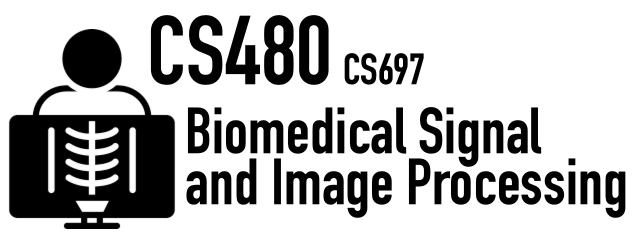
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [53]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
220 slices

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

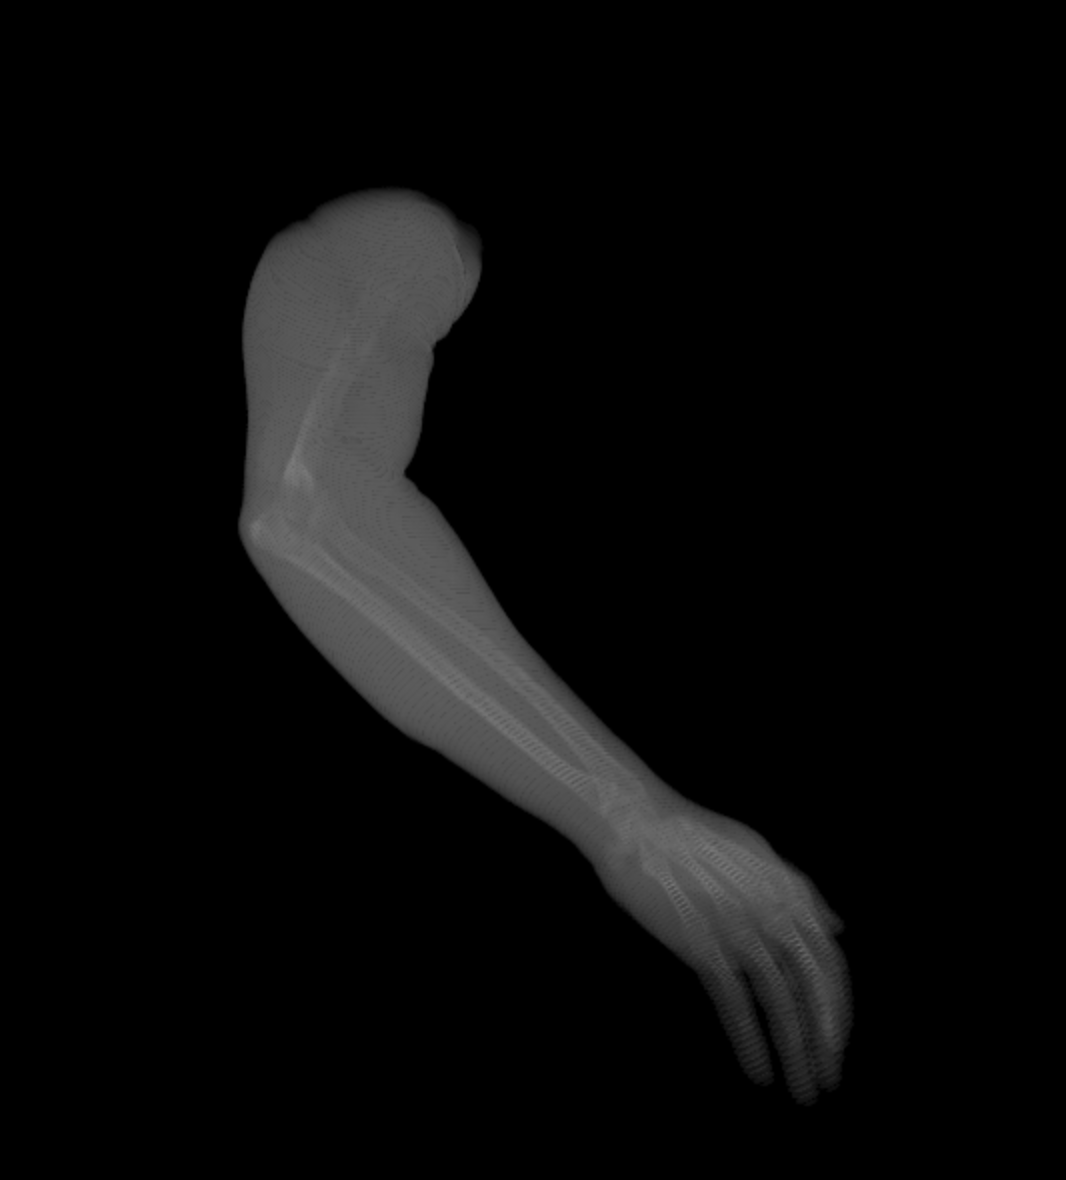

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [55]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [ ]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [102]:
import os

file_list = os.listdir("ct")

In [103]:
file_list.sort()
print(file_list)

['IM-0001-0001.dcm', 'IM-0001-0002.dcm', 'IM-0001-0003.dcm', 'IM-0001-0004.dcm', 'IM-0001-0005.dcm', 'IM-0001-0006.dcm', 'IM-0001-0007.dcm', 'IM-0001-0008.dcm', 'IM-0001-0009.dcm', 'IM-0001-0010.dcm', 'IM-0001-0011.dcm', 'IM-0001-0012.dcm', 'IM-0001-0013.dcm', 'IM-0001-0014.dcm', 'IM-0001-0015.dcm', 'IM-0001-0016.dcm', 'IM-0001-0017.dcm', 'IM-0001-0018.dcm', 'IM-0001-0019.dcm', 'IM-0001-0020.dcm', 'IM-0001-0021.dcm', 'IM-0001-0022.dcm', 'IM-0001-0023.dcm', 'IM-0001-0024.dcm', 'IM-0001-0025.dcm', 'IM-0001-0026.dcm', 'IM-0001-0027.dcm', 'IM-0001-0028.dcm', 'IM-0001-0029.dcm', 'IM-0001-0030.dcm', 'IM-0001-0031.dcm', 'IM-0001-0032.dcm', 'IM-0001-0033.dcm', 'IM-0001-0034.dcm', 'IM-0001-0035.dcm', 'IM-0001-0036.dcm', 'IM-0001-0037.dcm', 'IM-0001-0038.dcm', 'IM-0001-0039.dcm', 'IM-0001-0040.dcm', 'IM-0001-0041.dcm', 'IM-0001-0042.dcm', 'IM-0001-0043.dcm', 'IM-0001-0044.dcm', 'IM-0001-0045.dcm', 'IM-0001-0046.dcm', 'IM-0001-0047.dcm', 'IM-0001-0048.dcm', 'IM-0001-0049.dcm', 'IM-0001-0050.dcm',

In [104]:
from pydicom import dcmread

In [105]:
for i in range(len(file_list)):
  ds = dcmread('ct/' + file_list[i])
  arr = ds.pixel_array

In [ ]:
# Create 3d array, fill 3D array with the first image of the file

In [106]:
dss = dcmread('ct/' + file_list[0])

In [107]:
img_shape = list(dss.pixel_array.shape)
img_shape.append(len(file_list))
img3d = np.zeros(img_shape)

In [108]:
for i, s in enumerate(file_list):
    img3d[:, :, i] = dcmread('ct/' + file_list[i]).pixel_array

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [ ]:
# TODO: YOUR CODE FOR AXIAL

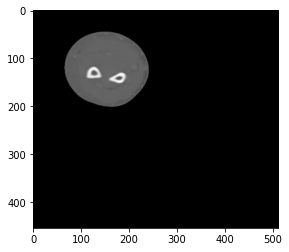

In [109]:
imshow(img3d[:, :, img_shape[2]//2], cmap='gray')

In [ ]:
# TODO: YOUR CODE FOR SAGITTAL

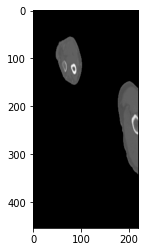

In [110]:
imshow(img3d[:, img_shape[1]//2, :], cmap='gray')

In [ ]:
# TODO: YOUR CODE FOR CORONAL

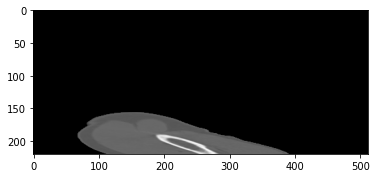

In [111]:
imshow(img3d[img_shape[0]//2, :, :].T, cmap='gray')

Reference: https://pydicom.github.io/pydicom/dev/auto_examples/image_processing/reslice.html

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [ ]:
# TODO: YOUR CODE

In [143]:
dss_new = dcmread('ct/' + file_list[50])

In [144]:
level = dss_new.WindowCenter
window = dss_new.WindowWidth
hu_pixels = dss_new.pixel_array
rescale = dss_new.RescaleIntercept

In [145]:
print(dss_new[0x0028, 0x1050])
print(dss_new[0x0028, 0x1051])

(0028, 1050) Window Center                       DS: '30.0'
(0028, 1051) Window Width                        DS: '410.0'


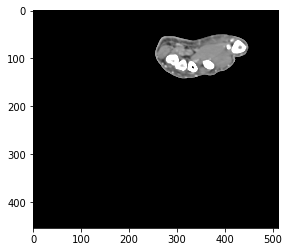

In [146]:
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [ ]:
# TODO: YOUR CODE

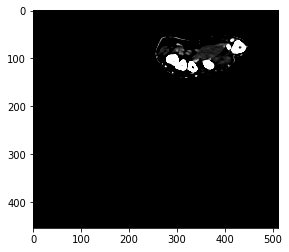

In [157]:
level = 100
window = 100
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

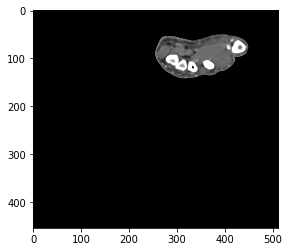

In [149]:
level = 100
window = 500
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

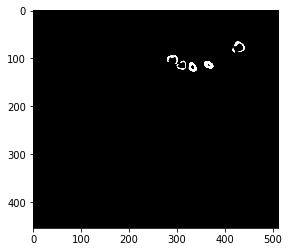

In [148]:
level = 500
window = 100
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

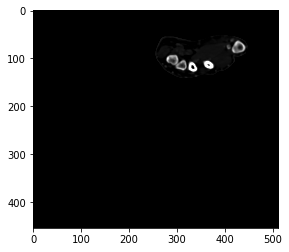

In [154]:
level = 500
window = 1000
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

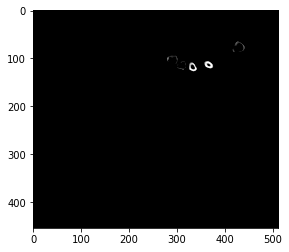

In [158]:
level = 1000
window = 1000
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

As the value of level increase, we can see bones clearly. But both of the window and value level should be in certain range.



Reference: https://stackoverflow.com/questions/58791377/medical-image-quality-problem-with-dicom-files

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT

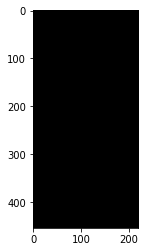

In [206]:
new_mask = img3d.copy()
new_mask[new_mask < -100] = 0
new_mask[new_mask > -50] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')
plt.show()

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

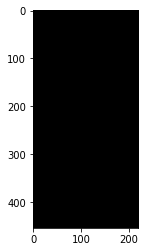

In [207]:
new_mask = img3d.copy()
new_mask[new_mask < 100] = 0
new_mask[new_mask > 300] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')
plt.show()

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

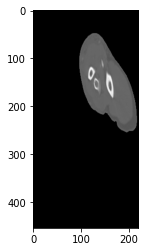

In [209]:
new_mask = img3d.copy()
new_mask[new_mask < 700] = 0
new_mask[new_mask > 3000] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

I applied the hounsfield unit to each threshold but I only can see bones. Each threshold visible when the numbers are over 600.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""